In [1]:
import csv
import functools
import itertools
import multiprocessing
import os
import sys

import SimpleITK as sitk

In [9]:
def convert_image(input_file_name, output_file_name=None, new_width=None):
    try:
        print('------------------------------------1')
        image_file_reader = sitk.ImageFileReader()
        # only read DICOM images
        image_file_reader.SetImageIO('GDCMImageIO')
        print('------------------------------------2')
        image_file_reader.SetFileName(input_file_name)
        image_file_reader.ReadImageInformation()
        print(image_file_reader)
        print('------------------------------------3')
        image_size = list(image_file_reader.GetSize())
        pirnt('image size:', image_size)
        if len(image_size) == 3 and image_size[2] == 1:
            image_size[2] = 0
        image_file_reader.SetExtractSize(image_size)
        image = image_file_reader.Execute()
        
        if new_width:
            original_size = image.GetSize()
            original_spacing = image.GetSpacing()
            new_spacing = [(original_size[0] - 1) * original_spacing[0]
                           / (new_width - 1)] * 2
            new_size = [new_width, int((original_size[1] - 1)
                                       * original_spacing[1] / new_spacing[1])]
            image = sitk.Resample(image1=image, size=new_size,
                                  transform=sitk.Transform(),
                                  interpolator=sitk.sitkLinear,
                                  outputOrigin=image.GetOrigin(),
                                  outputSpacing=new_spacing,
                                  outputDirection=image.GetDirection(),
                                  defaultPixelValue=0,
                                  outputPixelType=image.GetPixelID())
        # If a single channel image, rescale to [0,255]. Also modify the
        # intensity values based on the photometric interpretation. If
        # MONOCHROME2 (minimum should be displayed as black) we don't need to
        # do anything, if image has MONOCRHOME1 (minimum should be displayed as
        # white) we flip # the intensities. This is a constraint imposed by ITK
        # which always assumes MONOCHROME2.
        if image.GetNumberOfComponentsPerPixel() == 1:
            image = sitk.RescaleIntensity(image, 0, 255)
            if image_file_reader.GetMetaData('0028|0004').strip() \
                    == 'MONOCHROME1':
                image = sitk.InvertIntensity(image, maximum=255)
            image = sitk.Cast(image, sitk.sitkUInt8)
        if output_file_name:
            sitk.WriteImage(image, output_file_name)
        return image
    except BaseException:
        return False

In [15]:
def convert_image(input_file_name, output_file_name=None, new_width=None):
    print('------------------------------------1')
    image_file_reader = sitk.ImageFileReader()
    # only read DICOM images
    image_file_reader.SetImageIO('GDCMImageIO')
    print('------------------------------------2')
    image_file_reader.SetFileName(input_file_name)
    image_file_reader.ReadImageInformation()
    print(image_file_reader)
    print('------------------------------------3')
    image_size = list(image_file_reader.GetSize())
    print('image size:', image_size)
    if len(image_size) == 3 and image_size[2] == 1:
        image_size[2] = 0
    image_file_reader.SetExtractSize(image_size)
    image = image_file_reader.Execute()

    if new_width:
        original_size = image.GetSize()
        original_spacing = image.GetSpacing()
        new_spacing = [(original_size[0] - 1) * original_spacing[0]
                       / (new_width - 1)] * 2
        new_size = [new_width, int((original_size[1] - 1)
                                   * original_spacing[1] / new_spacing[1])]
        image = sitk.Resample(image1=image, size=new_size,
                              transform=sitk.Transform(),
                              interpolator=sitk.sitkLinear,
                              outputOrigin=image.GetOrigin(),
                              outputSpacing=new_spacing,
                              outputDirection=image.GetDirection(),
                              defaultPixelValue=0,
                              outputPixelType=image.GetPixelID())
    # If a single channel image, rescale to [0,255]. Also modify the
    # intensity values based on the photometric interpretation. If
    # MONOCHROME2 (minimum should be displayed as black) we don't need to
    # do anything, if image has MONOCRHOME1 (minimum should be displayed as
    # white) we flip # the intensities. This is a constraint imposed by ITK
    # which always assumes MONOCHROME2.
    if image.GetNumberOfComponentsPerPixel() == 1:
        image = sitk.RescaleIntensity(image, 0, 255)
        if image_file_reader.GetMetaData('0028|0004').strip() \
                == 'MONOCHROME1':
            image = sitk.InvertIntensity(image, maximum=255)
        image = sitk.Cast(image, sitk.sitkUInt8)
    if output_file_name:
        sitk.WriteImage(image, output_file_name)
    return image

In [18]:
image = convert_image('dicom_series/i0000,0000b.dcm')

------------------------------------1
------------------------------------2
itk::simple::ImageFileReader
  FileName: "dicom_series/i0000,0000b.dcm"
  ExtractSize: [ ]
  ExtractIndex: [ ]
  Image Information:
    PixelType: 32-bit signed integer
    Dimension: 3
    NumberOfComponents: 1
    Direction: [ 1, 0, 0, 0, 1, 0, 0, 0, 1 ]
    Origin: [ -185, -98, 1690.5 ]
    Spacing: [ 0.726563, 0.726563, 1 ]
    Size: [ 512, 512, 1 ]
  OutputPixelType: Unknown pixel id
  LoadPrivateTags: 0
  ImageIOName: GDCMImageIO
  Registered ImageIO:
	BMPImageIO ( *.bmp, *.BMP )
	BioRadImageIO ( *.PIC, *.pic )
	Bruker2dseqImageIO
	GDCMImageIO ( *.dcm, *.DCM, *.dicom, *.DICOM )
	GE4ImageIO
	GE5ImageIO
	GiplImageIO
	HDF5ImageIO
	JPEGImageIO ( *.jpg, *.JPG, *.jpeg, *.JPEG )
	LSMImageIO ( *.tif, *.TIF, *.tiff, *.TIFF, *.lsm, *.LSM )
	MINCImageIO ( *.mnc, *.MNC )
	MRCImageIO ( *.mrc, *.rec )
	MetaImageIO ( *.mha, *.mhd )
	NiftiImageIO ( *.nia, *.nii, *.nii.gz, *.hdr, *.img, *.img.gz )
	NrrdImageIO ( *.nrrd, *

In [19]:
type(image)

SimpleITK.SimpleITK.Image

In [21]:
arr = sitk.GetArrayFromImage(image)
type(arr)

numpy.ndarray

In [22]:
arr.shape

(512, 512)

In [23]:
import matplotlib.pyplot as plt

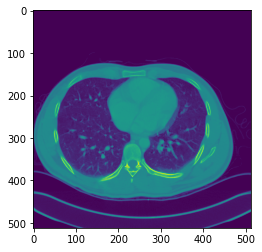

In [24]:
plt.imshow(arr)

In [25]:
input_file_name = 'dicom_series/i0000,0000b.dcm'
image_file_reader = sitk.ImageFileReader()
# only read DICOM images
image_file_reader.SetImageIO('GDCMImageIO')
print('------------------------------------2')
image_file_reader.SetFileName(input_file_name)
image_file_reader.ReadImageInformation()
print(image_file_reader)

------------------------------------2
itk::simple::ImageFileReader
  FileName: "dicom_series/i0000,0000b.dcm"
  ExtractSize: [ ]
  ExtractIndex: [ ]
  Image Information:
    PixelType: 32-bit signed integer
    Dimension: 3
    NumberOfComponents: 1
    Direction: [ 1, 0, 0, 0, 1, 0, 0, 0, 1 ]
    Origin: [ -185, -98, 1690.5 ]
    Spacing: [ 0.726563, 0.726563, 1 ]
    Size: [ 512, 512, 1 ]
  OutputPixelType: Unknown pixel id
  LoadPrivateTags: 0
  ImageIOName: GDCMImageIO
  Registered ImageIO:
	BMPImageIO ( *.bmp, *.BMP )
	BioRadImageIO ( *.PIC, *.pic )
	Bruker2dseqImageIO
	GDCMImageIO ( *.dcm, *.DCM, *.dicom, *.DICOM )
	GE4ImageIO
	GE5ImageIO
	GiplImageIO
	HDF5ImageIO
	JPEGImageIO ( *.jpg, *.JPG, *.jpeg, *.JPEG )
	LSMImageIO ( *.tif, *.TIF, *.tiff, *.TIFF, *.lsm, *.LSM )
	MINCImageIO ( *.mnc, *.MNC )
	MRCImageIO ( *.mrc, *.rec )
	MetaImageIO ( *.mha, *.mhd )
	NiftiImageIO ( *.nia, *.nii, *.nii.gz, *.hdr, *.img, *.img.gz )
	NrrdImageIO ( *.nrrd, *.nhdr )
	PNGImageIO ( *.png, *.PNG )
	

In [27]:
import pydicom

In [28]:
input_file_name = 'dicom_series/i0000,0000b.dcm'
ds = pydicom.read_file(input_file_name)
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.290142139912652972815729622292163617250
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.3.100.9.4
(0002, 0013) Implementation Version Name         SH: 'MATLAB IPT 9.4'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX']
(0008, 0012) Instance Creation Date              DA: ''
(0008, 0013) Instance Creation Time              TM: ''
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018)

- tag – a DICOM tag (as a Tag object)
- VR – DICOM value representation – various number and string formats, etc
- VM – value multiplicity. This is 1 for most DICOM tags, but can be multiple, e.g. for coordinates. You do not have to specify this, the DataElement class keeps track of it based on value.
- value – the actual value. A regular value like a number or string (or list of them), or a Sequence.
Tag

In [29]:
ds.keys()

dict_keys([(0008, 0005), (0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0080), (0008, 0081), (0008, 0090), (0008, 1010), (0008, 1030), (0008, 103e), (0008, 1040), (0008, 1070), (0008, 1090), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0010, 1000), (0010, 1010), (0010, 1030), (0018, 0010), (0018, 0015), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1030), (0018, 1040), (0018, 1041), (0018, 1046), (0018, 1047), (0018, 1049), (0018, 1100), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1210), (0018, 5100), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 0060), (0020, 1040), (0020, 1041), (0020, 4000), (0028, 0002), (0028, 0004), (0028, 00

In [34]:
len(ds.keys())

88

In [56]:
from pydicom.tag import Tag
ds[Tag(0x08, 0x08)]

(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX']

In [51]:
ds[Tag(0x08, 0x05)].VR

'CS'

In [53]:
ds[Tag(0x08, 0x08)].VM

4

In [54]:
ds[Tag(0x08, 0x08)].value

['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX']

In [55]:
ds[Tag(0x08, 0x08)].name

'Image Type'

In [57]:
ds[Tag(0x08, 0x08)].tag

(0008, 0008)

In [58]:
ds[Tag(0x08, 0x08)]

'ImageType'

In [46]:
# https://stackoverflow.com/questions/56601525/how-to-store-the-header-data-of-a-dicom-file-in-a-pandas-dataframe
import pandas as pd

ds = pydicom.read_file(input_file_name)
df = pd.DataFrame(ds.values())
df[0] = df[0].apply(lambda x: pydicom.dataelem.DataElement_from_raw(x) if isinstance(x, pydicom.dataelem.RawDataElement) else x)
df['name'] = df[0].apply(lambda x: x.name)
df['value'] = df[0].apply(lambda x: x.value)
df['key'] = [str(k) for k in ds.keys()]
df = df[['key', 'name', 'value']]

df.head()

,key,name,value
0,"(0008, 0005)",Specific Character Set,ISO_IR 100
1,"(0008, 0008)",Image Type,"[ORIGINAL, PRIMARY, AXIAL, HELIX]"
2,"(0008, 0012)",Instance Creation Date,
3,"(0008, 0013)",Instance Creation Time,
4,"(0008, 0016)",SOP Class UID,1.2.840.10008.5.1.4.1.1.2


In [59]:
# https://stackoverflow.com/questions/56601525/how-to-store-the-header-data-of-a-dicom-file-in-a-pandas-dataframe
import pandas as pd

ds = pydicom.read_file(input_file_name)
df = pd.DataFrame(ds.values())
df[0] = df[0].apply(lambda x: pydicom.dataelem.DataElement_from_raw(x) if isinstance(x, pydicom.dataelem.RawDataElement) else x)
df['name'] = df[0].apply(lambda x: x.name)
df['value'] = df[0].apply(lambda x: x.value)
df['VR'] = df[0].apply(lambda x: x.VR)
df['VM'] = df[0].apply(lambda x: x.VM)
df['key'] = [str(k) for k in ds.keys()]
# df = df[['key', 'name', 'value']]

df.head()

,0,name,value,VR,VM,key
0,"(0008, 0005) Specific Character Set ...",Specific Character Set,ISO_IR 100,CS,1,"(0008, 0005)"
1,"(0008, 0008) Image Type ...",Image Type,"[ORIGINAL, PRIMARY, AXIAL, HELIX]",CS,4,"(0008, 0008)"
2,"(0008, 0012) Instance Creation Date ...",Instance Creation Date,,DA,0,"(0008, 0012)"
3,"(0008, 0013) Instance Creation Time ...",Instance Creation Time,,TM,0,"(0008, 0013)"
4,"(0008, 0016) SOP Class UID ...",SOP Class UID,1.2.840.10008.5.1.4.1.1.2,UI,1,"(0008, 0016)"


In [43]:
df_1 = pd.DataFrame({'key':list(ds.keys())})
df_1

,key
0,524293
1,524296
2,524306
3,524307
4,524310
...,...
83,4194884
84,4194885
85,4194899
86,4194900


In [44]:
df_1 = pd.DataFrame({'key': [str(k) for k in ds.keys()]})
df_1

,key
0,"(0008, 0005)"
1,"(0008, 0008)"
2,"(0008, 0012)"
3,"(0008, 0013)"
4,"(0008, 0016)"
...,...
83,"(0040, 0244)"
84,"(0040, 0245)"
85,"(0040, 0253)"
86,"(0040, 0254)"


## metadata转换为pandas dataframe

In [60]:
def get_metadata(ds):
    pass

In [76]:
ds = pydicom.read_file(input_file_name)
# df = pd.DataFrame(ds.values())
# df[0] = df[0].apply(lambda x: pydicom.dataelem.DataElement_from_raw(x) if isinstance(x, pydicom.dataelem.RawDataElement) else x)
# df['name'] = df[0].apply(lambda x: x.name)
# df['value'] = df[0].apply(lambda x: x.value)
# df['VR'] = df[0].apply(lambda x: x.VR)
# df['VM'] = df[0].apply(lambda x: x.VM)
# df['key'] = [str(k) for k in ds.keys()]

data_dict = {
    'name': [],
    'key': [],
    'VR': [],
    'VM': [],
    'value': []
}
for k, v in ds.items():
    data_dict['key'].append(str(k))
    x = pydicom.dataelem.DataElement_from_raw(v) if isinstance(v, pydicom.dataelem.RawDataElement) else v
    data_dict['name'].append(x.name)
    data_dict['value'].append(x.value)
    data_dict['VR'].append(x.VR)
    data_dict['VM'].append(x.VM)
df = pd.DataFrame(data_dict)
df = df[['key', 'name', 'VR', 'VM', 'value']]
df.head()

,key,name,VR,VM,value
0,"(0008, 0005)",Specific Character Set,CS,1,ISO_IR 100
1,"(0008, 0008)",Image Type,CS,4,"[ORIGINAL, PRIMARY, AXIAL, HELIX]"
2,"(0008, 0012)",Instance Creation Date,DA,0,
3,"(0008, 0013)",Instance Creation Time,TM,0,
4,"(0008, 0016)",SOP Class UID,UI,1,1.2.840.10008.5.1.4.1.1.2


In [77]:
df.tail()

,key,name,VR,VM,value
83,"(0040, 0244)",Performed Procedure Step Start Date,DA,0,
84,"(0040, 0245)",Performed Procedure Step Start Time,TM,0,
85,"(0040, 0253)",Performed Procedure Step ID,SH,0,
86,"(0040, 0254)",Performed Procedure Step Description,LO,0,
87,"(7fe0, 0010)",Pixel Data,OB or OW,1,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...


In [78]:
df.columns

Index(['key', 'name', 'VR', 'VM', 'value'], dtype='object')

In [79]:
df.head().to_dict()

{'key': {0: '(0008, 0005)',
  1: '(0008, 0008)',
  2: '(0008, 0012)',
  3: '(0008, 0013)',
  4: '(0008, 0016)'},
 'name': {0: 'Specific Character Set',
  1: 'Image Type',
  2: 'Instance Creation Date',
  3: 'Instance Creation Time',
  4: 'SOP Class UID'},
 'VR': {0: 'CS', 1: 'CS', 2: 'DA', 3: 'TM', 4: 'UI'},
 'VM': {0: 1, 1: 4, 2: 0, 3: 0, 4: 1},
 'value': {0: 'ISO_IR 100',
  1: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX'],
  2: '',
  3: '',
  4: '1.2.840.10008.5.1.4.1.1.2'}}

In [72]:
solar = pd.read_csv('solar.csv')
solar

,State,Number of Solar Plants,Installed Capacity (MW),Average MW Per Plant,Generation (GWh)
0,California,289,4395,15.3,10826
1,Arizona,48,1078,22.5,2550
2,Nevada,11,238,21.6,557
3,New Mexico,33,261,7.9,590
4,Colorado,20,118,5.9,235
5,Texas,12,187,15.6,354
6,North Carolina,148,669,4.5,1162
7,New York,13,53,4.1,84


In [73]:
solar.to_dict()

{'State': {0: 'California',
  1: 'Arizona',
  2: 'Nevada',
  3: 'New Mexico',
  4: 'Colorado',
  5: 'Texas',
  6: 'North Carolina',
  7: 'New York'},
 'Number of Solar Plants': {0: 289,
  1: 48,
  2: 11,
  3: 33,
  4: 20,
  5: 12,
  6: 148,
  7: 13},
 'Installed Capacity (MW)': {0: 4395,
  1: 1078,
  2: 238,
  3: 261,
  4: 118,
  5: 187,
  6: 669,
  7: 53},
 'Average MW Per Plant': {0: 15.3,
  1: 22.5,
  2: 21.6,
  3: 7.9,
  4: 5.9,
  5: 15.6,
  6: 4.5,
  7: 4.1},
 'Generation (GWh)': {0: 10826,
  1: 2550,
  2: 557,
  3: 590,
  4: 235,
  5: 354,
  6: 1162,
  7: 84}}

In [74]:
solar.to_dict('records')

[{'State': 'California',
  'Number of Solar Plants': 289,
  'Installed Capacity (MW)': 4395,
  'Average MW Per Plant': 15.3,
  'Generation (GWh)': 10826},
 {'State': 'Arizona',
  'Number of Solar Plants': 48,
  'Installed Capacity (MW)': 1078,
  'Average MW Per Plant': 22.5,
  'Generation (GWh)': 2550},
 {'State': 'Nevada',
  'Number of Solar Plants': 11,
  'Installed Capacity (MW)': 238,
  'Average MW Per Plant': 21.6,
  'Generation (GWh)': 557},
 {'State': 'New Mexico',
  'Number of Solar Plants': 33,
  'Installed Capacity (MW)': 261,
  'Average MW Per Plant': 7.9,
  'Generation (GWh)': 590},
 {'State': 'Colorado',
  'Number of Solar Plants': 20,
  'Installed Capacity (MW)': 118,
  'Average MW Per Plant': 5.9,
  'Generation (GWh)': 235},
 {'State': 'Texas',
  'Number of Solar Plants': 12,
  'Installed Capacity (MW)': 187,
  'Average MW Per Plant': 15.6,
  'Generation (GWh)': 354},
 {'State': 'North Carolina',
  'Number of Solar Plants': 148,
  'Installed Capacity (MW)': 669,
  'Avera

In [81]:
df.head().to_dict('records')

[{'key': '(0008, 0005)',
  'name': 'Specific Character Set',
  'VR': 'CS',
  'VM': 1,
  'value': 'ISO_IR 100'},
 {'key': '(0008, 0008)',
  'name': 'Image Type',
  'VR': 'CS',
  'VM': 4,
  'value': ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX']},
 {'key': '(0008, 0012)',
  'name': 'Instance Creation Date',
  'VR': 'DA',
  'VM': 0,
  'value': ''},
 {'key': '(0008, 0013)',
  'name': 'Instance Creation Time',
  'VR': 'TM',
  'VM': 0,
  'value': ''},
 {'key': '(0008, 0016)',
  'name': 'SOP Class UID',
  'VR': 'UI',
  'VM': 1,
  'value': '1.2.840.10008.5.1.4.1.1.2'}]

In [82]:
df.to_csv('dicom_sample_metadata.csv', index=False)